<a href="https://colab.research.google.com/github/yashpal-byte/data_science/blob/main/NewspaperData_3models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('NewspaperData.csv')
df.head()

,Newspaper,daily,sunday
0,Baltimore Sun,391.952,488.506
1,Boston Globe,516.981,798.298
2,Boston Herald,355.628,235.084
3,Charlotte Observer,238.555,299.451
4,Chicago Sun Times,537.780,559.093


# Attributes

In [3]:
df.axes #returns values of rows and column

[RangeIndex(start=0, stop=34, step=1),
 Index(['Newspaper', 'daily', 'sunday'], dtype='object')]

In [4]:
df.index #returns values of rows

RangeIndex(start=0, stop=34, step=1)

In [5]:
df.columns #returns values of column headers

Index(['Newspaper', 'daily', 'sunday'], dtype='object')

In [6]:
df.iloc[4,:]

Newspaper    Chicago Sun Times
daily                   537.78
sunday                 559.093
Name: 4, dtype: object

In [7]:
df.loc[33, 'Newspaper']

'Washington Post'

In [8]:
df.dtypes

Newspaper     object
daily        float64
sunday       float64
dtype: object

In [9]:
df.iat[4,1]

537.78

In [10]:
df.ndim #returns dimension of the data could be 1 for series or list, 2 for list of list or dataframe

2

In [11]:
df.values

array([['Baltimore Sun', 391.952, 488.506],
       ['Boston Globe', 516.981, 798.298],
       ['Boston Herald', 355.62800000000004, 235.084],
       ['Charlotte Observer', 238.555, 299.45099999999996],
       ['Chicago Sun Times', 537.78, 559.0930000000001],
       ['Chicago Tribune', 733.775, 1133.249],
       ['Cincinnati Enquirer', 198.832, 348.744],
       ['Denver Post', 252.62400000000002, 417.779],
       ['Des Moines Register', 206.204, 344.522],
       ['Hartford Courant', 231.17700000000002, 323.084],
       ['Houston Chronicle', 449.755, 620.752],
       ['Kansas City Star', 288.57099999999997, 423.305],
       ['Los Angeles Daily  News', 185.736, 202.614],
       ['Los Angeles Times', 1164.388, 1531.527],
       ['Miami Herald', 444.58099999999996, 553.479],
       ['Minneapolis Star Tribune', 412.871, 685.975],
       ['New Orleans Times-Picayune', 272.28, 324.241],
       ['New York Daily News', 781.796, 983.24],
       ['New York Times', 1209.225, 1762.015],
       ['New

In [12]:
df.size

102

In [13]:
df.shape

(34, 3)

In [14]:
df.style

,Newspaper,daily,sunday
0,Baltimore Sun,391.952000,488.506000
1,Boston Globe,516.981000,798.298000
2,Boston Herald,355.628000,235.084000
3,Charlotte Observer,238.555000,299.451000
4,Chicago Sun Times,537.780000,559.093000
5,Chicago Tribune,733.775000,1133.249000
6,Cincinnati Enquirer,198.832000,348.744000
7,Denver Post,252.624000,417.779000
8,Des Moines Register,206.204000,344.522000
9,Hartford Courant,231.177000,323.084000


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Newspaper  34 non-null     object 
 1   daily      34 non-null     float64
 2   sunday     34 non-null     float64
dtypes: float64(2), object(1)
memory usage: 944.0+ bytes


# **After checking the attributes and checking the values. Data does not have any null values**

# Newspaper column is unique in nature contains names of the news paper
# dataframe has 3 variables which has one unique, 2 continuous numerical
# target variable is sunday, predictor variable is daily


In [16]:
#describing the dataset

df.describe()

,daily,sunday
count,34.000000,34.000000
mean,430.962471,591.202412
std,269.211470,376.418051
min,133.239000,202.614000
25%,233.021500,327.769500
50%,355.235500,436.712500
75%,516.616500,699.735250
max,1209.225000,1762.015000


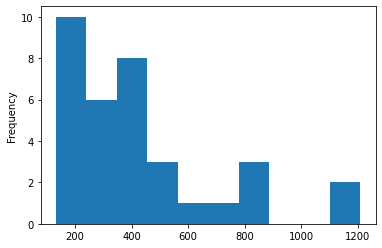

In [17]:
df['daily'].plot.hist()

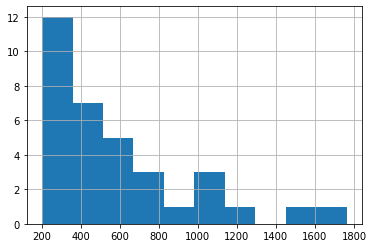

In [18]:
df['sunday'].hist()

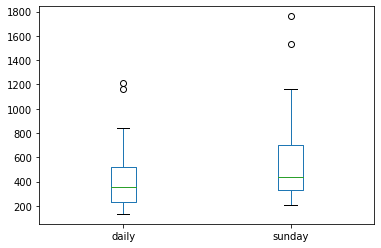

In [19]:
df.plot.box()

# From boxplot we can infere that daily column and sunday column has outliers. Both columns are positively skewed

In [20]:
#outliers 
df[df['daily'] > 900]

,Newspaper,daily,sunday
13,Los Angeles Times,1164.388,1531.527
18,New York Times,1209.225,1762.015


In [21]:
#Correlation
df.corr()

,daily,sunday
daily,1.000000,0.958154
sunday,0.958154,1.000000


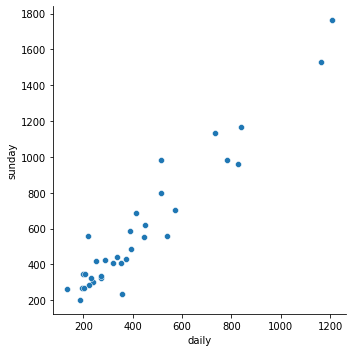

In [22]:
import seaborn as sns
sns.relplot(x = 'daily', y = 'sunday', data = df)

### Both numerical columns have correlation coefficient of 0.95 That means they are is linear relationship. observation which are outlier in daily column has corresponding outlier values in sunday column

#**Model Building** 

## Model 1

In [23]:
import statsmodels.formula.api as smf

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [24]:
model = smf.ols('sunday~daily', data = df)

In [25]:
print('parameters:',model.fit().params)
print('t-value and p-value:',model.fit().tvalues, model.fit().pvalues)

parameters: Intercept    13.835630
daily         1.339715
dtype: float64
t-value and p-value: Intercept     0.386427
daily        18.934840
dtype: float64 Intercept    7.017382e-01
daily        6.016802e-19
dtype: float64


In [26]:
model.fit().rsquared

0.9180596895873295

In [27]:
model.fit().rsquared_adj

0.9154990548869336

## Model 2

### let's remove outliers and build new model

In [28]:
df2 = df[:]

In [29]:
df2[df2['daily'] > 900]

,Newspaper,daily,sunday
13,Los Angeles Times,1164.388,1531.527
18,New York Times,1209.225,1762.015


In [30]:
df2.drop([13,18], inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [31]:
df2

,Newspaper,daily,sunday
0,Baltimore Sun,391.952,488.506
1,Boston Globe,516.981,798.298
2,Boston Herald,355.628,235.084
3,Charlotte Observer,238.555,299.451
4,Chicago Sun Times,537.780,559.093
5,Chicago Tribune,733.775,1133.249
6,Cincinnati Enquirer,198.832,348.744
7,Denver Post,252.624,417.779
8,Des Moines Register,206.204,344.522
9,Hartford Courant,231.177,323.084


In [32]:
df2.reset_index(inplace = True)

In [33]:
df2.drop('index', axis = 1, inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [34]:
df2

,Newspaper,daily,sunday
0,Baltimore Sun,391.952,488.506
1,Boston Globe,516.981,798.298
2,Boston Herald,355.628,235.084
3,Charlotte Observer,238.555,299.451
4,Chicago Sun Times,537.780,559.093
5,Chicago Tribune,733.775,1133.249
6,Cincinnati Enquirer,198.832,348.744
7,Denver Post,252.624,417.779
8,Des Moines Register,206.204,344.522
9,Hartford Courant,231.177,323.084


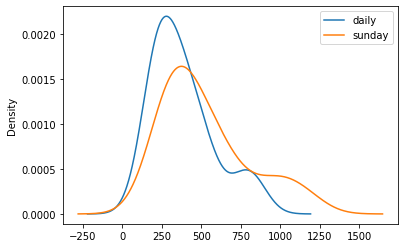

In [35]:
df2.plot.density()

In [36]:
df2.corr()

,daily,sunday
daily,1.000000,0.917674
sunday,0.917674,1.000000


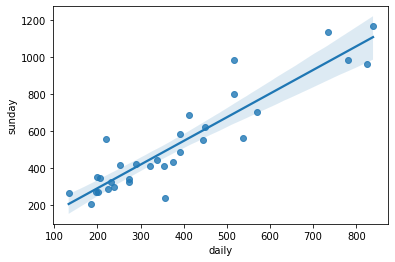

In [37]:
sns.regplot(x='daily', y='sunday', data = df2)

In [38]:
model1= smf.ols('sunday~daily', data = df2).fit()

In [39]:
model1.rsquared

0.8421264503596158

In [40]:
model1.rsquared_adj

0.8368639987049362

In [41]:
model1.params

Intercept    34.895607
daily         1.277835
dtype: float64

## After removing outliers there is difference in rsquared value from previous model, which is model 1

## Building model 3 by applying log transformations

In [42]:
def normal(series):
  upper = series.max()
  lower = series.min()
  y = (series - lower)/(upper-lower)
  return y

In [43]:
transform = np.log(df[['daily','sunday']])

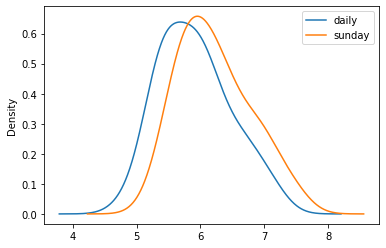

In [44]:
transform.plot.density()

In [45]:
transform1 = np.log(np.log(df[['daily','sunday']]))

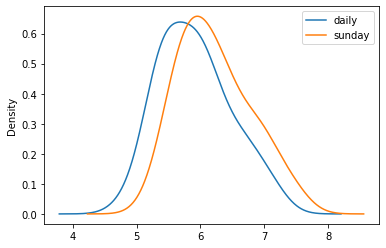

In [46]:
transform.plot.density()

In [51]:
df3 = df2[:]

In [52]:
df3[['daily','sunday']] = np.log(df3[['daily','sunday']])

In [53]:
df3.head()

,Newspaper,daily,sunday
0,Baltimore Sun,5.971139,6.191352
1,Boston Globe,6.248006,6.682482
2,Boston Herald,5.873885,5.459943
3,Charlotte Observer,5.474600,5.701951
4,Chicago Sun Times,6.287450,6.326316


### checking correlation with scatter plot and matrix

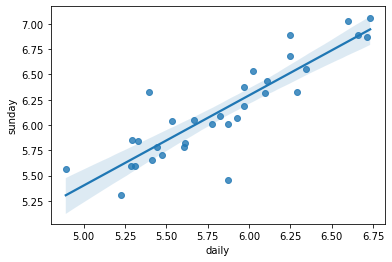

In [56]:
sns.regplot(x='daily', y = 'sunday', data = df3)

In [54]:
df3.corr()

,daily,sunday
daily,1.000000,0.884655
sunday,0.884655,1.000000


In [57]:
#regression model

model3 = smf.ols('sunday~daily', data = df3).fit()

In [59]:
model3.params

Intercept    0.946032
daily        0.891181
dtype: float64

In [60]:
model3.tvalues

Intercept     1.884308
daily        10.392471
dtype: float64

In [62]:
model3.pvalues

Intercept    6.924603e-02
daily        1.852509e-11
dtype: float64

In [64]:
model3.rsquared, model3.rsquared_adj

(0.782614133449617, 0.7753679378979376)

# Prediction with all the models

In [73]:
series = pd.Series([400, 600, 700])
data = pd.DataFrame(series, columns = ['daily'])
data['sunday'] = np.nan
data

,daily,sunday
0,400,NaN
1,600,NaN
2,700,NaN


In [80]:
model.fit().predict(data)

0    549.721533
1    817.664485
2    951.635960
dtype: float64

In [78]:
model1.predict(data)

0    546.029697
1    801.596742
2    929.380265
dtype: float64

In [81]:
model3.predict(data)

0    357.418520
1    535.654765
2    624.772887
dtype: float64

### **As outliers were removed accuracy of the model reduced and since it is a right skewed data log transformation was done. Due to which accuracy reduced even**